<a href="https://www.kaggle.com/code/ahmedelgantiry/simple-model-of-customer-churn-rat-f1-score-84?scriptVersionId=133997847" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


In [2]:
df=pd.read_excel("/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx")

In [3]:
df.shape

(7043, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### drop unuseful columns

In [5]:
df=df.drop(columns=["CustomerID","City","Zip Code","Lat Long","Latitude","Longitude","Total Charges","CLTV","Churn Reason","Churn Label","State","Tenure Months","Count","Country","Churn Score"],axis=1)

In [6]:
df.shape

(7043, 18)

In [7]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Gender,2
Senior Citizen,2
Partner,2
Dependents,2
Phone Service,2
Multiple Lines,3
Internet Service,3
Online Security,3
Online Backup,3


In [8]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Paperless Billing',
 'Churn Value']

In [9]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Payment Method']

In [10]:
[[i, list(df[i].unique())] for i in categorical_variables]

[['Multiple Lines', ['No', 'Yes', 'No phone service']],
 ['Internet Service', ['DSL', 'Fiber optic', 'No']],
 ['Online Security', ['Yes', 'No', 'No internet service']],
 ['Online Backup', ['Yes', 'No', 'No internet service']],
 ['Device Protection', ['No', 'Yes', 'No internet service']],
 ['Tech Support', ['No', 'Yes', 'No internet service']],
 ['Streaming TV', ['No', 'Yes', 'No internet service']],
 ['Streaming Movies', ['No', 'Yes', 'No internet service']],
 ['Contract', ['Month-to-month', 'Two year', 'One year']],
 ['Payment Method',
  ['Mailed check',
   'Electronic check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']]]

In [11]:
numeric_variables = list(set(df.columns)  - set(categorical_variables) - set(binary_variables))

In [12]:
numeric_variables

['Monthly Charges']

In [13]:
df['Monthly Charges'] = pd.cut(df['Monthly Charges'], bins=5)

In [14]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [15]:
lb, le = LabelBinarizer(), LabelEncoder()

In [16]:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [17]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [18]:
df = pd.get_dummies(df, columns =["Monthly Charges"], drop_first=True)

In [19]:
df["Churn Value"].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,7043.0,0.504756,0.500013,0.0,0.0,1.0,1.0,1.0
Senior Citizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,0.231010,0.421508,0.0,0.0,0.0,0.0,1.0
Phone Service,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
Paperless Billing,7043.0,0.592219,0.491457,0.0,0.0,1.0,1.0,1.0
Churn Value,7043.0,0.265370,0.441561,0.0,0.0,0.0,1.0,1.0
Multiple Lines_No phone service,7043.0,0.096834,0.295752,0.0,0.0,0.0,0.0,1.0
Multiple Lines_Yes,7043.0,0.421837,0.493888,0.0,0.0,0.0,1.0,1.0
Internet Service_Fiber optic,7043.0,0.439585,0.496372,0.0,0.0,0.0,1.0,1.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [22]:
y, X = df["Churn Value"], df.drop(columns="Churn Value")


In [23]:
# using over sampling because the label is unbalanced 

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X, y = over_sampler.fit_resample(X,y)
print(X.shape)

(10348, 31)


In [24]:
y.value_counts()

1    5174
0    5174
Name: Churn Value, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
y_train.value_counts()

0    3898
1    3863
Name: Churn Value, dtype: int64

## knearst neighbor model

In [27]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1920x1440 with 0 Axes>

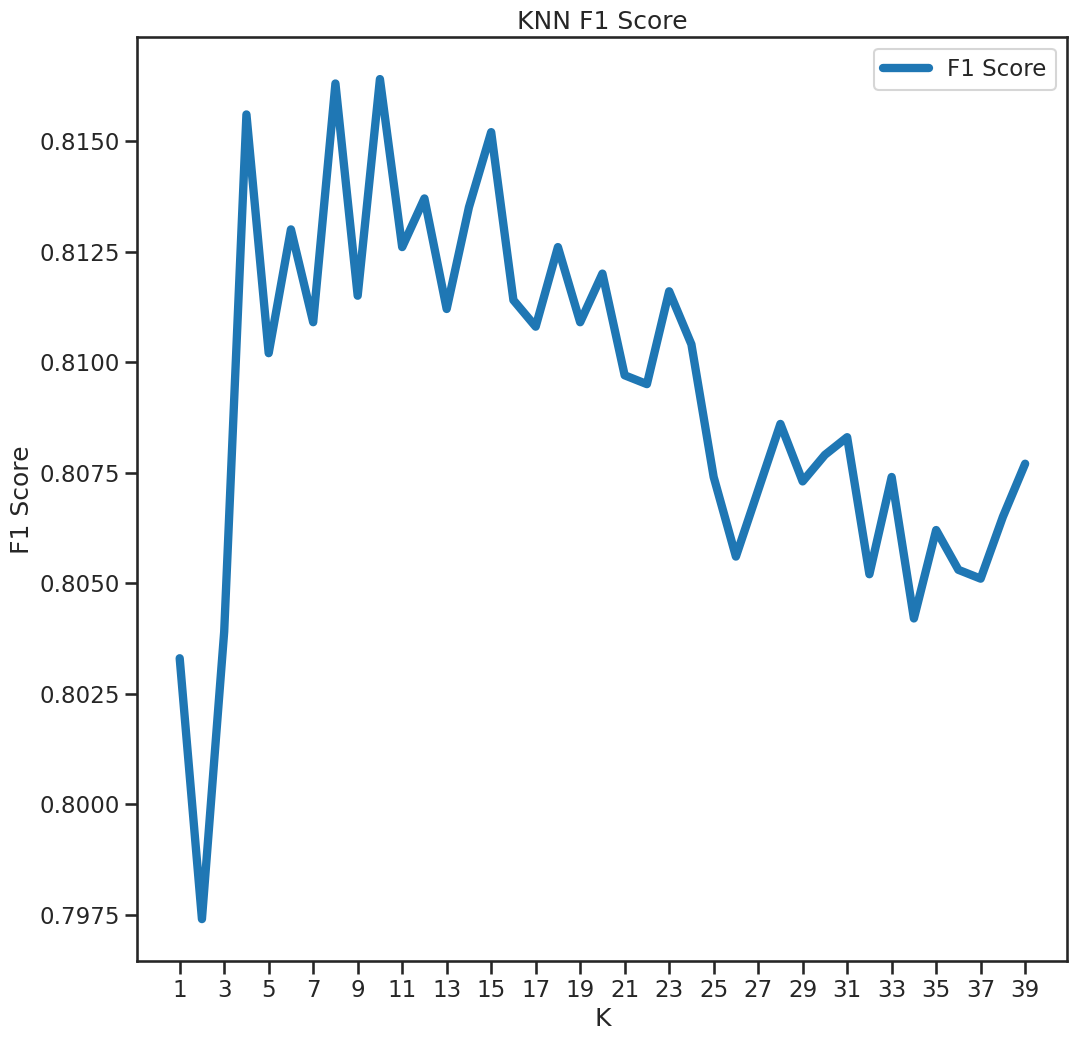

In [29]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')


Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1920x1440 with 0 Axes>

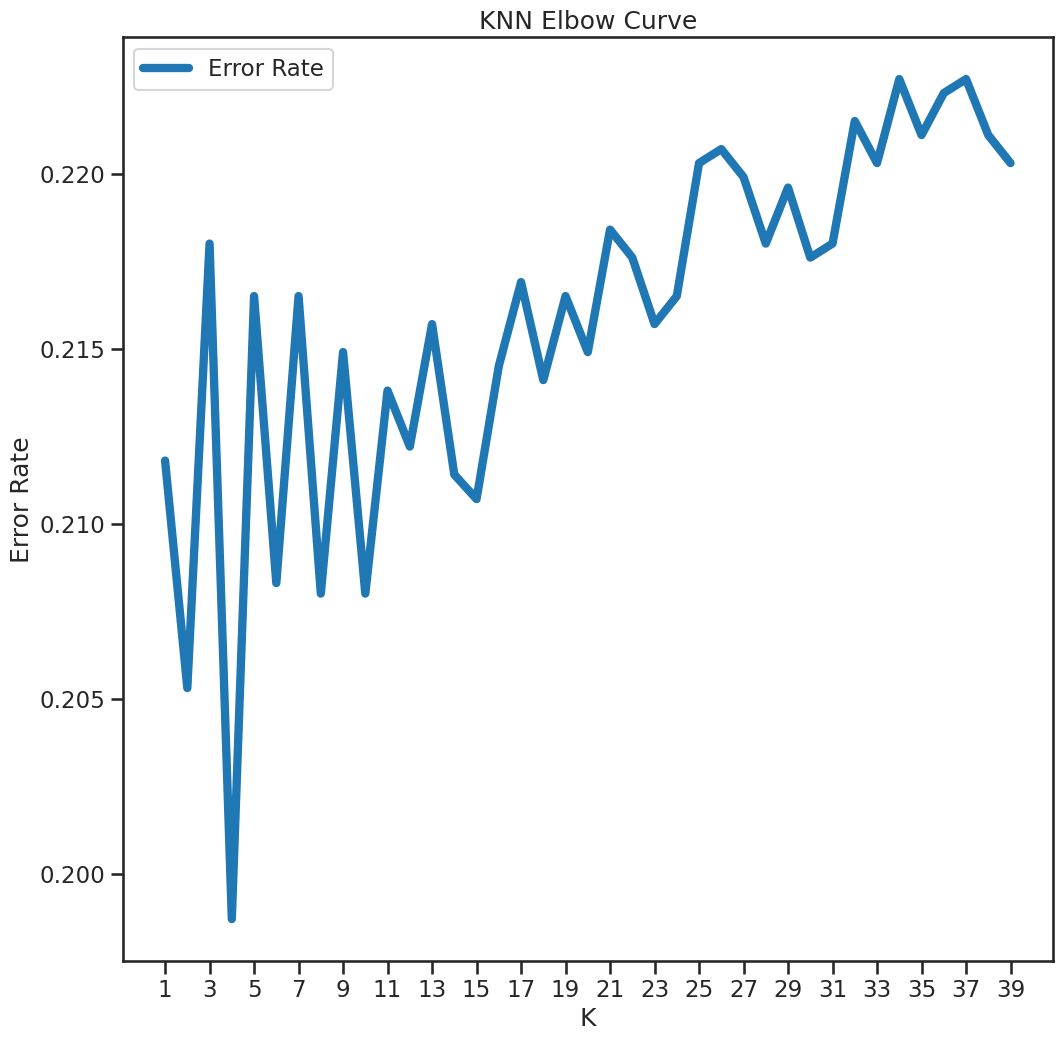

In [30]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1276
           1       0.76      0.85      0.80      1311

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

Accuracy score:  0.79
F1 Score:  0.8


## Gradient boost classifier model 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
clf = GradientBoostingClassifier()

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {"max_depth":range(2,10),"n_estimators":range(5,50,5)}
params

{'max_depth': range(2, 10), 'n_estimators': range(5, 50, 5)}

In [36]:
GBC_model = GridSearchCV(clf,param_grid=params,cv=3,n_jobs=-1,verbose=1)

In [37]:
model1=GBC_model.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [38]:
y_pred = model1.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1276
           1       0.79      0.90      0.84      1311

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

Accuracy score:  0.83
F1 Score:  0.84
